In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller

In [2]:
# αποθηκευσε το αρχειο xls σε κειμενο χωρισμενο σε κομματα με καταληξη .csv
#df= pd.read_csv('corn monthly prices since 2002.csv')
#df.head(5)

# Ο Εναρμονισμένος Δείκτης Τιμών Καταναλωτή (HICP) 

Οι Εν.ΔΤΚ χρησιμεύουν για την παρακολούθηση ενός από τα κριτήρια εισόδου στην Οικονομική και Νομισματική Ένωση. Συγκεκριμένα, οι Εν.ΔΤΚ υπολογίζονται για να παρέχουν συγκρίσιμα στοιχεία για τις διεθνείς συγκρίσεις του πληθωρισμού και, ειδικότερα, για την εκτίμηση του κριτηρίου σύγκλισης, της σταθερότητας των τιμών, όπως απαιτείται από τη Συνθήκη για την ΟΝΕ. Σε κάθε Κράτος-μέλος της ΕΕ καταρτίζεται ο Εν.ΔΤΚ, χρησιμοποιώντας μια εναρμονισμένη μεθοδολογία, η οποία αναπτύχθηκε από Ευρωπαίους στατιστικούς, υπό την καθοδήγηση της Eurostat. Σύμφωνα με τη Συνθήκη του Μάαστριχτ, ο σκοπός του Εν.ΔΤΚ είναι η μέτρηση του πληθωρισμού μέσω του δείκτη τιμών καταναλωτή, επί μιας συγκρίσιμης βάσης, λαμβάνοντας υπόψη διαφορές σε εθνικούς ορισμούς. Ο Εν.ΔΤΚ βασίζεται στις τιμές αγαθών και υπηρεσιών που προσφέρονται στην οικονομική επικράτεια του Κράτους-μέλους, για την άμεση ικανοποίηση των αναγκών των καταναλωτών. 

### Από ποιες δαπάνες υπολογίζετα ο Εν.ΔΤΚ;

H γεωγραφική και πληθυσμιακή κάλυψη του Εν.ΔΤΚ κάθε Κράτους-μέλους (συνεπώς και του Εν.ΔΤΚ της Ελλάδος) συμπεριλαμβάνει: α) τις δαπάνες όλων των ιδιωτικών νοικοκυριών (ανεξάρτητα από την περιοχή στην οποία διαμένουν – αστική, ημιαστική ή αγροτική – και ανεξάρτητα με τη θέση τους, όσον αφορά στην κατανομή του εισοδήματος), β) τις δαπάνες των ξένων επισκεπτών (τουριστών) στη Χώρα και γ) τις δαπάνες των ατόμων που διαμένουν σε ιδρύματα (οικοτροφεία, οίκοι ευγηρίας, νοσοκομεία, κλπ.). Αντίθετα, εξαιρούνται της κάλυψης του Εν.ΔΤΚ ενός Κράτους-μέλους (συνεπώς και του ελληνικού Εν.ΔΤΚ) οι δαπάνες που πραγματοποιούνται για επιχειρηματικούς (επαγγελματικούς) σκοπούς, καθώς και οι δαπάνες των μόνιμων κατοίκων του Κράτους-μέλους, όταν βρίσκονται στο εξωτερικό. 

### Ο δείκτης Εν.ΔΤΚ στην Ελλάδα

Ο ελληνικός Εν.ΔΤΚ καλύπτει το σύνολο Χώρας. Συγκεκριμένα, καλύπτονται και οι 13 Περιφέρειες (NUTS 2) της Ελλάδος. Η συλλογή τιμών (τιμοληψία) των ειδών του Εν.ΔΤΚ διενεργείται στις ίδιες ακριβώς πόλεις της Ελλάδος (24 στον αριθμό) με εκείνες του εθνικού ΔΤΚ.

### Η ταξινόμηση των ειδών για την ανάθεση τιμής

Η ταξινόμηση των ειδών (αγαθών και υπηρεσιών) που περιλαμβάνονται στον Εν.ΔΤΚ βασίζεται στη διεθνή ταξινόμηση COICOP (Classification Of Individual COnsumption by Purpose) και ιδιαίτερα, όπως αυτή έχει προσαρμοσθεί για τις ανάγκες των Εν.ΔΤΚ, δημιουργώντας την ταξινόμηση COICOP / HICP. Σύμφωνα με την εν λόγω ταξινόμηση, τα είδη που υπεισέρχονται στον υπολογισμό του Εν.ΔΤΚ ταξινομούνται σε δώδεκα (12) βασικές ομάδες, με διφήφιο κωδικό, σε τριάντα εννέα (39) ομάδες, με τριψήφιο κωδικό, και σε ενενήντα τρείς (93) υπο-ομάδες με τετραψήφιο κωδικό.

### HICP Vs CPI

Η κύρια διαφορά μεταξύ του ΔΤΚ και του Εν.ΔΤΚ προέρχεται από τις διαφορετικές προσεγγίσεις(διαφορετικός συντελεστής) τους ως προς το εκμαρτό μίσθωμα (ενοίκιο). Ενώ ο εθνικός ΔΤΚ αποδίδει ένα σχετικά υψηλό βάρος στο τεκμαρτό μίσθωμα (πάνω από το 10% του καταναλωτικού καλαθιού), ο Εν.ΔΤΚ δεν λαμβάνει καθόλου υπόψη αυτό το στοιχείο. 

Η παρακάτω εικόνα, απεικονίζει τα βάρη των καλαθιών των καταναλωτών του ΔΤΚ και του Εν.ΔΤΚ επί της χιλίοις.
Διαφέρουν κυρίως στις κατηγορίες κατοικιών και τροφίμων.

In [3]:
from IPython.display import Image
Image(url="CPI VS HICP.jpg", width=600, height=700)

In [4]:
%%html
<a href="https://www.statistics.gr/el/statistics?p_p_id=documents_WAR_publicationsportlet_INSTANCE_0qObWqzRnXSG&p_p_lifecycle=2&p_p_state=normal&p_p_mode=view&p_p_cacheability=cacheLevelPage&p_p_col_id=column-1&p_p_col_count=4&p_p_col_pos=1&_documents_WAR_publicationsportlet_INSTANCE_0qObWqzRnXSG_javax.faces.resource=document&_documents_WAR_publicationsportlet_INSTANCE_0qObWqzRnXSG_ln=downloadResources&_documents_WAR_publicationsportlet_INSTANCE_0qObWqzRnXSG_documentID=114878&_documents_WAR_publicationsportlet_INSTANCE_0qObWqzRnXSG_locale=el">O Εναρμονισμένος Δείκτης Τιμών Καταναλωτή από το Υπουργίο Οικονομίας & Οικονομικών </a>

Για περισσότερες πληροφορίες για τον Εν.ΔΤΚ σχετικά με το βάρος του κάθε αγαθού και υπηρεσίας στην τελική τιμή του 
δείκτη και την κάλυψη των ειδών που παρέχει, επισκεφτείτε τον παραπάνω σύνδεσμο.


# MONTHLY HICP VALUES FOR GREECE

In [5]:
df= pd.read_csv('HICP - monthly data.csv')
df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,coicop,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I05,CP00,AT,1996-01,86.68,NaN
1,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I05,CP00,AT,1996-02,86.94,NaN
2,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I05,CP00,AT,1996-03,87.20,NaN
3,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I05,CP00,AT,1996-04,87.11,NaN
4,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I05,CP00,AT,1996-05,87.03,NaN


In [6]:
df = df[df['geo'] == 'EL']
df = df[df['coicop'] == 'CP00']
df = df[df['unit'] == 'I15']
df.reset_index(inplace=True)
df

,index,DATAFLOW,LAST UPDATE,freq,unit,coicop,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,2201332,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I15,CP00,EL,1996-01,59.04,NaN
1,2201333,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I15,CP00,EL,1996-02,58.92,NaN
2,2201334,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I15,CP00,EL,1996-03,60.64,NaN
3,2201335,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I15,CP00,EL,1996-04,61.25,NaN
4,2201336,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I15,CP00,EL,1996-05,61.74,NaN
...,...,...,...,...,...,...,...,...,...,...
315,2201647,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I15,CP00,EL,2022-04,110.55,NaN
316,2201648,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I15,CP00,EL,2022-05,111.59,NaN
317,2201649,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I15,CP00,EL,2022-06,114.05,NaN
318,2201650,ESTAT:PRC_HICP_MIDX(1.0),16/09/22 11:00:00,M,I15,CP00,EL,2022-07,112.19,NaN


In [7]:
df.drop(['index', 'DATAFLOW', 'LAST UPDATE', 'freq', 'coicop', 'unit', 'geo', 'OBS_FLAG'], inplace=True, axis=1)
df

,TIME_PERIOD,OBS_VALUE
0,1996-01,59.04
1,1996-02,58.92
2,1996-03,60.64
3,1996-04,61.25
4,1996-05,61.74
...,...,...
315,2022-04,110.55
316,2022-05,111.59
317,2022-06,114.05
318,2022-07,112.19


In [8]:
df.rename(columns = {'TIME_PERIOD':'time'}, inplace = True)
df['time'].replace(regex=True,inplace=True, to_replace='M',value='')
df['time'] =  pd.to_datetime(df['time'], format='%Y%m', errors='ignore', infer_datetime_format=True)
#df = df.set_index(['time'])

In [9]:
df.rename(columns = {'OBS_VALUE':'value'}, inplace = True)

In [10]:
df[df['time'] == '1996-01-01']

,time,value
0,1996-01-01,59.04


In [11]:
df[pd.isnull(df['value'])].count()

time     0
value    0
dtype: int64

In [12]:
df = df.set_index(['time'])

Text(0.5, 1.0, 'HICP')

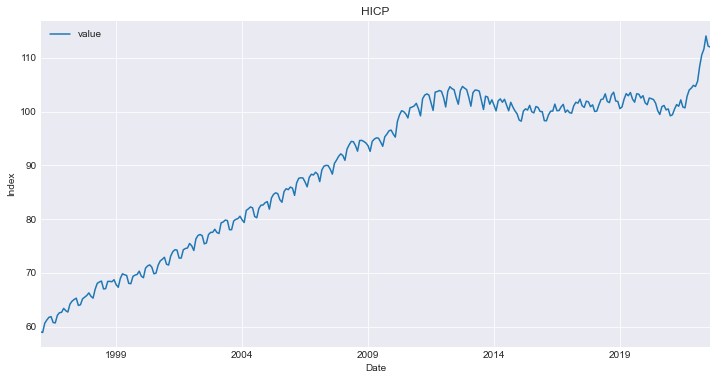

In [13]:
rcParams['figure.figsize'] = 12, 6
df.plot()
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("HICP")

In [14]:
print("Is the HICP monthly value stationary ?")
for col in df.columns:
    result = adfuller(df[col])
    print('p-value for ' + col + ' : %f' % result[1])
    
print('if p-value > 0.05 then the timeseries is not stationary, therefore the HICP monthly timeseries is not stationary.')

Is the HICP monthly value stationary ?
p-value for value : 0.913308
if p-value > 0.05 then the timeseries is not stationary, therefore the HICP monthly timeseries is not stationary.


In [15]:
from IPython.display import Image
Image(url="stationary vs non-stationary.png", width=600, height=700)

In [16]:
df

,value
time,
1996-01-01,59.04
1996-02-01,58.92
1996-03-01,60.64
1996-04-01,61.25
1996-05-01,61.74
...,...
2022-04-01,110.55
2022-05-01,111.59
2022-06-01,114.05


# ANNUAL HICP VALUES FOR GREECE

In [17]:
df= pd.read_csv('HICP - annual data.csv')
df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,coicop,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,AP,AT,2002,73.64,NaN
1,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,AP,AT,2003,75.24,NaN
2,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,AP,AT,2004,77.05,NaN
3,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,AP,AT,2005,79.55,NaN
4,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,AP,AT,2006,81.52,NaN


In [18]:
df = df[df['geo'] == 'EL'] # EL αντιπροσωπεύει την Ελλάδα
df = df[df['coicop'] == 'CP00'] # CP00 αντιπροσωπεύει όλες τις τιμές των  δεικτών HICP για όλα τα προϊόντα
df = df[df['unit'] == 'INX_A_AVG'] # INX_A_AVG είναι ο μ΄έσος όρος των τιμών του δείκτη HICP για ένα έτος
df.reset_index(inplace=True)
df.head()

,index,DATAFLOW,LAST UPDATE,freq,unit,coicop,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,3798,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,CP00,EL,1996,61.31,NaN
1,3799,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,CP00,EL,1997,64.64,NaN
2,3800,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,CP00,EL,1998,67.56,NaN
3,3801,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,CP00,EL,1999,69.01,NaN
4,3802,ESTAT:PRC_HICP_AIND(1.0),16/09/22 11:00:00,A,INX_A_AVG,CP00,EL,2000,71.01,NaN


In [19]:
df.drop(['index', 'DATAFLOW', 'LAST UPDATE', 'freq', 'coicop', 'unit', 'geo', 'OBS_FLAG'], inplace=True, axis=1)
df.head()

,TIME_PERIOD,OBS_VALUE
0,1996,61.31
1,1997,64.64
2,1998,67.56
3,1999,69.01
4,2000,71.01


In [20]:
df.rename(columns = {'TIME_PERIOD':'time'}, inplace = True)
df['time'].replace(regex=True,inplace=True, to_replace='M',value='')

In [21]:
df.rename(columns = {'OBS_VALUE':'value'}, inplace = True)

In [22]:
df[pd.isnull(df['value'])].count()

time     0
value    0
dtype: int64

In [23]:
df = df.set_index(['time'])

Text(0.5, 1.0, 'HICP')

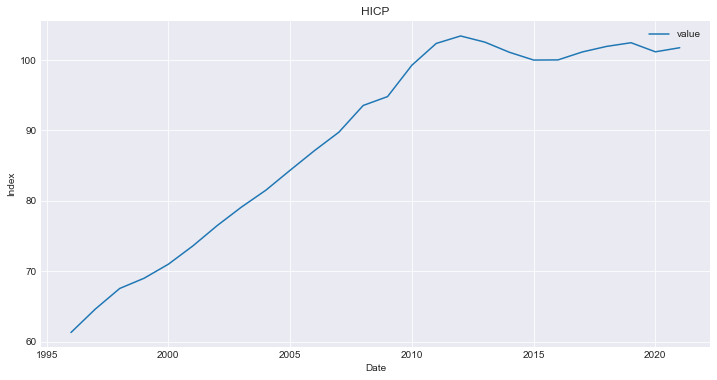

In [24]:
rcParams['figure.figsize'] = 12, 6
df.plot()
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("HICP")

In [25]:
print("Is the HICP yearly value stationary ?")
for col in df.columns:
    result = adfuller(df[col])
    print('p-value for ' + col + ' : %f' % result[1])
    
print('if p-value > 0.05 then the timeseries is not stationary, therefore the HICP annual timeseries is not stationary.')

Is the HICP yearly value stationary ?
p-value for value : 0.372916
if p-value > 0.05 then the timeseries is not stationary, therefore the HICP annual timeseries is not stationary.
